In [1]:
import pandas as pd
import numpy as np
import torch
import gc
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import random
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pymop import Problem
import os
from tslearn.datasets import UCR_UEA_datasets
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn


/home/jacqueline/.local/share/virtualenvs/TSInterpret-x4eqnPOt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset='ElectricDevices'
X_train,train_y,X_test,test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train
test_x=X_test
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder_tf.pkl','wb'))
#enc1=pickle.load(open(f'../../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','rb'))
test_y=enc1.transform(test_y.reshape(-1,1))
n_classes = test_y.shape[1]


In [3]:
import tensorflow as tf 
model = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')


2023-09-19 07:32:02.634236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 07:32:03.306787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-19 07:32:03.908472: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-19 07:32:03.908909: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

In [4]:
observation_01= X_test[0]
label_01 =test_y[0]

print(observation_01.shape)
print(label_01.shape)


(96, 1)
(7,)


In [5]:
from TSInterpret.InterpretabilityModels.counterfactual.TSEvoCF import TSEvo
exp =TSEvo(model= model,data=(test_x,test_y), backend='TF',mode='time',epochs =100)

y was one Hot Encoded


In [6]:

pop,label_cf=exp.explain(observation_01.reshape(1,-1,1),np.array([np.argmax(label_01)]))

No Target


In [7]:
np.array(pop).shape

(1, 96)

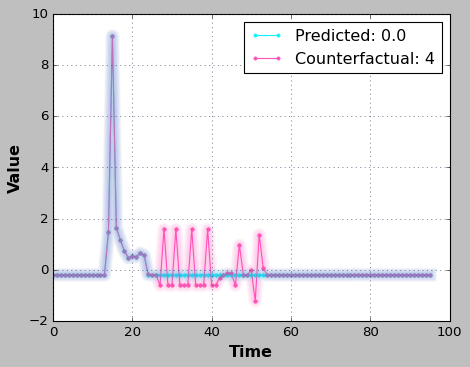

In [8]:
exp.plot_in_one(observation_01.reshape(1,-1,1),label_01[0],pop,np.argmax(label_cf),save_fig=None)